In [1]:
import yfinance as yf
import pandas as pd
from datetime import date
import matplotlib.pyplot as plt
from prophet import Prophet

df = yf.download('BTC-USD', start='2010-01-01',
                end=date.today())

#data.to_csv('../data/historical_yfinance/btc_usd.csv')


[*********************100%***********************]  1 of 1 completed


In [2]:
#df = pd.read_csv('../data/historical_yfinance/btc_usd.csv')
df = df.reset_index()

In [3]:
df['Date'] = pd.to_datetime(df['Date'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2778 entries, 0 to 2777
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       2778 non-null   datetime64[ns]
 1   Open       2778 non-null   float64       
 2   High       2778 non-null   float64       
 3   Low        2778 non-null   float64       
 4   Close      2778 non-null   float64       
 5   Adj Close  2778 non-null   float64       
 6   Volume     2778 non-null   int64         
dtypes: datetime64[ns](1), float64(5), int64(1)
memory usage: 152.0 KB


In [4]:
df[['ds','y']] = df [['Date', 'Adj Close']]

df

,Date,Open,High,Low,Close,Adj Close,Volume,ds,y
0,2014-09-17,465.864014,468.174011,452.421997,457.334015,457.334015,21056800,2014-09-17,457.334015
1,2014-09-18,456.859985,456.859985,413.104004,424.440002,424.440002,34483200,2014-09-18,424.440002
2,2014-09-19,424.102997,427.834991,384.532013,394.795990,394.795990,37919700,2014-09-19,394.795990
3,2014-09-20,394.673004,423.295990,389.882996,408.903992,408.903992,36863600,2014-09-20,408.903992
4,2014-09-21,408.084991,412.425995,393.181000,398.821014,398.821014,26580100,2014-09-21,398.821014
...,...,...,...,...,...,...,...,...,...
2773,2022-04-21,41371.515625,42893.582031,40063.828125,40527.363281,40527.363281,35372786395,2022-04-21,40527.363281
2774,2022-04-22,40525.863281,40777.757812,39315.417969,39740.320312,39740.320312,28011716745,2022-04-22,39740.320312
2775,2022-04-23,39738.722656,39935.859375,39352.203125,39486.730469,39486.730469,16138021249,2022-04-23,39486.730469
2776,2022-04-24,39478.375000,39845.925781,39233.539062,39469.292969,39469.292969,17964398167,2022-04-24,39469.292969


In [5]:
model = Prophet()
model.fit(df)

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Initial log joint probability = -57.2427


    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       5213.09     0.0824634       1048.58           1           1      118   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     170       5221.39   0.000379598       189.247   1.226e-06       0.001      248  LS failed, Hessian reset 
     199       5224.39   0.000642643       115.138      0.3856           1      283   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     260       5230.25    0.00132265       224.618    1.29e-05       0.001      402  LS failed, Hessian reset 
     299       5232.28   0.000511392       109.508       0.857       0.857      449   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     370       5233.68   0.000310044       126.645   4.483e-06       0.001      572  LS failed, Hessian reset 
     399       5233.71   5.15436e-05  

In [26]:
prediction_days = 365
future = model.make_future_dataframe(prediction_days, freq='d')
forecast = model.predict(future)
forecast

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2014-09-17,-162.309984,-9052.262455,6308.260469,-162.309984,-162.309984,-1155.202130,-1155.202130,-1155.202130,44.342089,44.342089,44.342089,-1199.544219,-1199.544219,-1199.544219,0.0,0.0,0.0,-1317.512114
1,2014-09-18,-160.983506,-8944.352899,6306.430169,-160.983506,-160.983506,-1265.861296,-1265.861296,-1265.861296,-20.458186,-20.458186,-20.458186,-1245.403110,-1245.403110,-1245.403110,0.0,0.0,0.0,-1426.844802
2,2014-09-19,-159.657028,-9284.774299,6133.048421,-159.657028,-159.657028,-1294.527626,-1294.527626,-1294.527626,-9.555251,-9.555251,-9.555251,-1284.972376,-1284.972376,-1284.972376,0.0,0.0,0.0,-1454.184654
3,2014-09-20,-158.330549,-8762.596949,6593.852208,-158.330549,-158.330549,-1316.979895,-1316.979895,-1316.979895,0.841182,0.841182,0.841182,-1317.821076,-1317.821076,-1317.821076,0.0,0.0,0.0,-1475.310444
4,2014-09-21,-157.004071,-8863.579240,6389.936074,-157.004071,-157.004071,-1366.029784,-1366.029784,-1366.029784,-22.457087,-22.457087,-22.457087,-1343.572696,-1343.572696,-1343.572696,0.0,0.0,0.0,-1523.033855
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3138,2023-04-21,77873.910604,69720.671653,86770.806271,74212.571295,81419.355012,562.159251,562.159251,562.159251,-9.555251,-9.555251,-9.555251,571.714502,571.714502,571.714502,0.0,0.0,0.0,78436.069855
3139,2023-04-22,77933.129826,70260.277573,87359.278164,74249.894070,81505.138301,686.858487,686.858487,686.858487,0.841182,0.841182,0.841182,686.017306,686.017306,686.017306,0.0,0.0,0.0,78619.988314
3140,2023-04-23,77992.349049,70032.403596,86943.699193,74288.034293,81581.746731,789.703898,789.703898,789.703898,-22.457087,-22.457087,-22.457087,812.160986,812.160986,812.160986,0.0,0.0,0.0,78782.052947
3141,2023-04-24,78051.568272,70458.146261,87557.152818,74341.116399,81648.865183,940.854712,940.854712,940.854712,-6.968938,-6.968938,-6.968938,947.823650,947.823650,947.823650,0.0,0.0,0.0,78992.422984


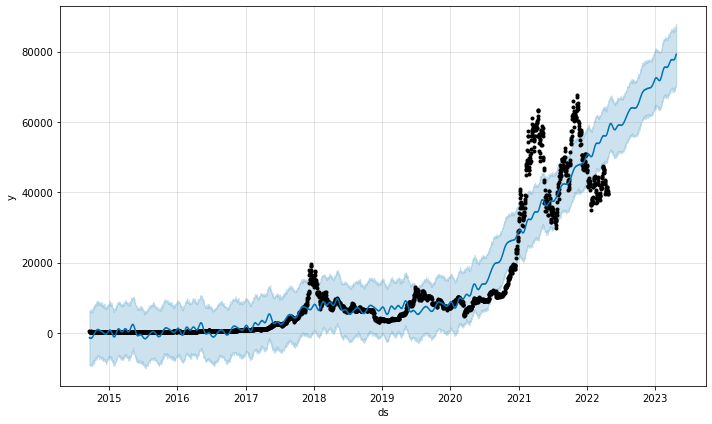

In [27]:
model.plot(forecast)
plt.show()

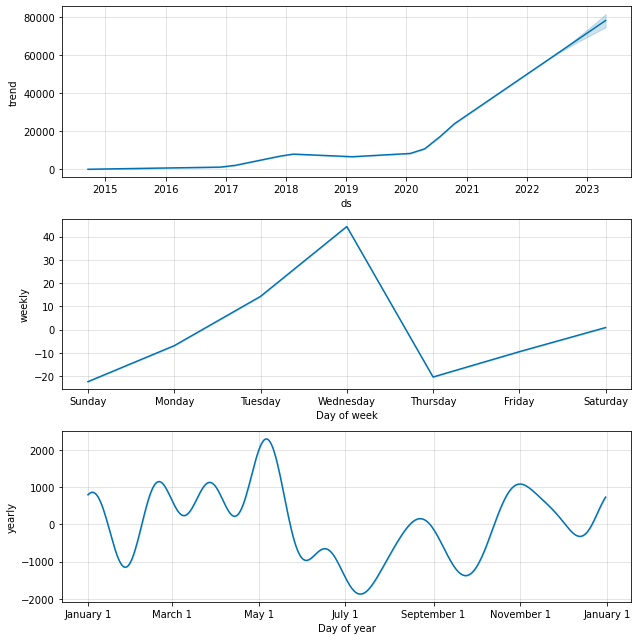

In [14]:
model.plot_components(forecast)
plt.show()